# Table of Contents
- [Imports](#Imports)
- [Set Up](#Set-Up)
- [Data Loaders](#Data-Loaders)
- [Model Training](#Model-Training)
- [Evaluation](#Evaluation)
- [Evaluation Insights](#Evaluation-Insights)
- [Interpretation using LIME](#Interpretation-using-LIME)
- [LIME visualizations for three random samples](#LIME-visualizations-for-three-random-samples)
- [Best/Worst Performing Samples](#Best/Worst-Performing-Samples)
- [Best/Worst Performing Insights](#Best-Performing-Samples)
- [Performance Per Gender](#Performance-Per-Gender)
- [Performance Per Age Group](#Performance-Per-Age-Group)
- [Performance Per Gender/Age Group Insights](#Age-Group-Challenges)

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay

from trainer import train_model
from evaluator import evaluate_model, load_model_from_checkpoint
from evaluator import evaluate_samples, get_best_and_worst_samples, load_model_from_checkpoint
from interpret import interpret_sample, ModelWrapper
from base_model import MultiTaskResNet
from utils_data_loader import get_custom_data_loaders_v4
from evaluation import generate_classification_report, perform_threshold_analysis, plot_confusion_matrix

# Set Up

In [2]:
CHECKPOINT_DIR = "checkpoints"
RESULTS_FILE = "metrics.csv"
EVALUATION_FILE = "evaluation_metrics.csv"

BATCH_SIZE = 32
MAX_EPOCHS = 10
LEARNING_RATE = 0.0001
VERSION = 'v4'

# Data Loaders

In [3]:
train_loader, val_loader, test_loader = get_custom_data_loaders_v4(batch_size=BATCH_SIZE)

[DEBUG] Loaded 14164 images from data/train
[DEBUG] Loaded 4722 images from data/validation
[DEBUG] Loaded 4722 images from data/test


# Model Training

In [5]:
print(f"--- Training Model Version: {VERSION} ---")
model = MultiTaskResNet(learning_rate=LEARNING_RATE)
train_model(model, train_loader, val_loader, test_loader, VERSION, max_epochs=MAX_EPOCHS, checkpoint_dir=CHECKPOINT_DIR)
# 52m 52.9s

--- Training Model Version: v4 ---


c:\Users\Liberty\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Liberty\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Liberty\anaconda3\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:652: Checkpoint directory C:\Users\Liberty\Desktop\CodingProjects\deep learning - sprint 3\modeling\checkpoints exists and is not empty.

  | Name  | Type         

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\Liberty\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Val Gender Accuracy: 0.0312
Val Age MAE: 22.8704
Val Gender Accuracy: 0.0312
Val Age MAE: 13.0229


c:\Users\Liberty\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Train Gender Accuracy: 0.4062
Train Age MAE: 30.1974
Train Gender Accuracy: 0.6250
Train Age MAE: 36.0616
Train Gender Accuracy: 0.3750
Train Age MAE: 34.4451
Train Gender Accuracy: 0.4688
Train Age MAE: 26.2090
Train Gender Accuracy: 0.5000
Train Age MAE: 35.5025
Train Gender Accuracy: 0.4688
Train Age MAE: 30.2451
Train Gender Accuracy: 0.6562
Train Age MAE: 34.8605
Train Gender Accuracy: 0.5938
Train Age MAE: 30.5762
Train Gender Accuracy: 0.5312
Train Age MAE: 29.4363
Train Gender Accuracy: 0.5000
Train Age MAE: 30.5626
Train Gender Accuracy: 0.6562
Train Age MAE: 34.7854
Train Gender Accuracy: 0.7500
Train Age MAE: 30.3572
Train Gender Accuracy: 0.7188
Train Age MAE: 31.5313
Train Gender Accuracy: 0.7188
Train Age MAE: 31.4088
Train Gender Accuracy: 0.7500
Train Age MAE: 37.8590
Train Gender Accuracy: 0.6875
Train Age MAE: 30.1483
Train Gender Accuracy: 0.7500
Train Age MAE: 34.4271
Train Gender Accuracy: 0.6562
Train Age MAE: 24.2350
Train Gender Accuracy: 0.8438
Train Age MAE: 3

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8125
Val Age MAE: 7.5815
Val Gender Accuracy: 0.9062
Val Age MAE: 5.8098
Val Gender Accuracy: 0.9062
Val Age MAE: 6.6261
Val Gender Accuracy: 0.8438
Val Age MAE: 7.3488
Val Gender Accuracy: 0.8750
Val Age MAE: 5.3577
Val Gender Accuracy: 0.8125
Val Age MAE: 3.0737
Val Gender Accuracy: 0.6562
Val Age MAE: 3.6445
Val Gender Accuracy: 0.7812
Val Age MAE: 2.8180
Val Gender Accuracy: 0.7812
Val Age MAE: 4.6027
Val Gender Accuracy: 0.8750
Val Age MAE: 5.5495
Val Gender Accuracy: 0.9375
Val Age MAE: 3.9421
Val Gender Accuracy: 0.9062
Val Age MAE: 4.9113
Val Gender Accuracy: 0.8438
Val Age MAE: 3.8811
Val Gender Accuracy: 0.8125
Val Age MAE: 3.9067
Val Gender Accuracy: 0.8125
Val Age MAE: 3.4135
Val Gender Accuracy: 0.9062
Val Age MAE: 3.3156
Val Gender Accuracy: 0.9688
Val Age MAE: 3.2443
Val Gender Accuracy: 0.9062
Val Age MAE: 3.0852
Val Gender Accuracy: 0.5938
Val Age MAE: 4.1174
Val Gender Accuracy: 0.8125
Val Age MAE: 3.4380
Val Gender Accuracy: 0.7812
Val Age MAE:

Metric val_loss improved. New best score: 86.576
Epoch 0, global step 443: 'val_loss' reached 86.57590 (best 86.57590), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v4_best.ckpt' as top 1


Val Gender Accuracy: 0.5312
Val Age MAE: 8.0131
Val Gender Accuracy: 0.4444
Val Age MAE: 9.0240
Train Gender Accuracy: 0.6875
Train Age MAE: 6.1866
Train Gender Accuracy: 0.8125
Train Age MAE: 5.1431
Train Gender Accuracy: 0.7812
Train Age MAE: 5.2057
Train Gender Accuracy: 0.6562
Train Age MAE: 5.4139
Train Gender Accuracy: 0.7188
Train Age MAE: 5.2008
Train Gender Accuracy: 0.7188
Train Age MAE: 5.1241
Train Gender Accuracy: 0.7188
Train Age MAE: 7.1592
Train Gender Accuracy: 0.7500
Train Age MAE: 3.6475
Train Gender Accuracy: 0.7500
Train Age MAE: 5.2151
Train Gender Accuracy: 0.7812
Train Age MAE: 5.5557
Train Gender Accuracy: 0.5312
Train Age MAE: 5.3489
Train Gender Accuracy: 0.7500
Train Age MAE: 6.2298
Train Gender Accuracy: 0.7812
Train Age MAE: 7.3663
Train Gender Accuracy: 0.8125
Train Age MAE: 6.1842
Train Gender Accuracy: 0.6250
Train Age MAE: 5.9408
Train Gender Accuracy: 0.6250
Train Age MAE: 4.8611
Train Gender Accuracy: 0.7812
Train Age MAE: 5.8648
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8438
Val Age MAE: 7.1659
Val Gender Accuracy: 0.9375
Val Age MAE: 5.7318
Val Gender Accuracy: 0.8750
Val Age MAE: 8.1850
Val Gender Accuracy: 0.8750
Val Age MAE: 8.4021
Val Gender Accuracy: 0.9062
Val Age MAE: 6.7427
Val Gender Accuracy: 0.7188
Val Age MAE: 3.4851
Val Gender Accuracy: 0.6250
Val Age MAE: 2.8356
Val Gender Accuracy: 0.8438
Val Age MAE: 2.4950
Val Gender Accuracy: 0.6875
Val Age MAE: 6.0508
Val Gender Accuracy: 0.8750
Val Age MAE: 6.0157
Val Gender Accuracy: 0.8750
Val Age MAE: 6.6485
Val Gender Accuracy: 0.9062
Val Age MAE: 5.4053
Val Gender Accuracy: 0.8438
Val Age MAE: 5.1248
Val Gender Accuracy: 0.8438
Val Age MAE: 4.4102
Val Gender Accuracy: 0.9062
Val Age MAE: 4.9676
Val Gender Accuracy: 0.8125
Val Age MAE: 5.0923
Val Gender Accuracy: 0.9375
Val Age MAE: 3.3143
Val Gender Accuracy: 0.8438
Val Age MAE: 4.4280
Val Gender Accuracy: 0.7812
Val Age MAE: 4.8155
Val Gender Accuracy: 0.8438
Val Age MAE: 4.1123
Val Gender Accuracy: 0.8438
Val Age MAE:

Metric val_loss improved by 22.721 >= min_delta = 0.0. New best score: 63.855
Epoch 1, global step 886: 'val_loss' reached 63.85452 (best 63.85452), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v4_best.ckpt' as top 1


Val Gender Accuracy: 0.3889
Val Age MAE: 10.2204
Train Gender Accuracy: 0.9375
Train Age MAE: 7.0286
Train Gender Accuracy: 0.6250
Train Age MAE: 5.9943
Train Gender Accuracy: 0.7188
Train Age MAE: 3.8062
Train Gender Accuracy: 0.6875
Train Age MAE: 3.1038
Train Gender Accuracy: 0.8750
Train Age MAE: 4.1898
Train Gender Accuracy: 0.7812
Train Age MAE: 3.4791
Train Gender Accuracy: 0.9062
Train Age MAE: 5.0189
Train Gender Accuracy: 0.8125
Train Age MAE: 4.4943
Train Gender Accuracy: 0.8750
Train Age MAE: 4.0273
Train Gender Accuracy: 0.8750
Train Age MAE: 4.7587
Train Gender Accuracy: 0.7812
Train Age MAE: 6.0951
Train Gender Accuracy: 0.8438
Train Age MAE: 4.1368
Train Gender Accuracy: 0.6875
Train Age MAE: 5.4262
Train Gender Accuracy: 0.9062
Train Age MAE: 4.7957
Train Gender Accuracy: 0.8125
Train Age MAE: 5.7178
Train Gender Accuracy: 0.8438
Train Age MAE: 4.3421
Train Gender Accuracy: 0.7500
Train Age MAE: 3.4243
Train Gender Accuracy: 0.8125
Train Age MAE: 4.6560
Train Gender Ac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9688
Val Age MAE: 6.3422
Val Gender Accuracy: 1.0000
Val Age MAE: 4.6789
Val Gender Accuracy: 0.9375
Val Age MAE: 5.9414
Val Gender Accuracy: 0.9375
Val Age MAE: 7.0296
Val Gender Accuracy: 1.0000
Val Age MAE: 5.0723
Val Gender Accuracy: 0.8125
Val Age MAE: 2.4600
Val Gender Accuracy: 0.7188
Val Age MAE: 1.4075
Val Gender Accuracy: 0.8750
Val Age MAE: 1.0309
Val Gender Accuracy: 0.8750
Val Age MAE: 4.4301
Val Gender Accuracy: 0.8750
Val Age MAE: 5.5581
Val Gender Accuracy: 0.9062
Val Age MAE: 5.7527
Val Gender Accuracy: 0.9062
Val Age MAE: 5.5607
Val Gender Accuracy: 0.9688
Val Age MAE: 4.5342
Val Gender Accuracy: 1.0000
Val Age MAE: 3.9982
Val Gender Accuracy: 0.9688
Val Age MAE: 4.0481
Val Gender Accuracy: 1.0000
Val Age MAE: 4.4743
Val Gender Accuracy: 0.9688
Val Age MAE: 4.1977
Val Gender Accuracy: 1.0000
Val Age MAE: 3.5343
Val Gender Accuracy: 0.8750
Val Age MAE: 4.2729
Val Gender Accuracy: 0.9375
Val Age MAE: 3.9628
Val Gender Accuracy: 0.9688
Val Age MAE:

Metric val_loss improved by 2.870 >= min_delta = 0.0. New best score: 60.985
Epoch 2, global step 1329: 'val_loss' reached 60.98484 (best 60.98484), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v4_best.ckpt' as top 1


Val Gender Accuracy: 0.3125
Val Age MAE: 7.4275
Val Gender Accuracy: 0.3889
Val Age MAE: 8.3573
Train Gender Accuracy: 0.8125
Train Age MAE: 5.8144
Train Gender Accuracy: 0.7500
Train Age MAE: 4.6375
Train Gender Accuracy: 0.8125
Train Age MAE: 6.4038
Train Gender Accuracy: 0.8750
Train Age MAE: 5.0426
Train Gender Accuracy: 0.7500
Train Age MAE: 4.2196
Train Gender Accuracy: 0.7188
Train Age MAE: 6.3068
Train Gender Accuracy: 0.7500
Train Age MAE: 4.8124
Train Gender Accuracy: 0.8125
Train Age MAE: 3.6998
Train Gender Accuracy: 0.8438
Train Age MAE: 3.5418
Train Gender Accuracy: 0.8125
Train Age MAE: 4.3791
Train Gender Accuracy: 0.7812
Train Age MAE: 3.2075
Train Gender Accuracy: 0.7812
Train Age MAE: 3.0519
Train Gender Accuracy: 0.7812
Train Age MAE: 4.7216
Train Gender Accuracy: 0.7500
Train Age MAE: 3.6659
Train Gender Accuracy: 0.7500
Train Age MAE: 4.6712
Train Gender Accuracy: 0.8438
Train Age MAE: 3.1641
Train Gender Accuracy: 0.7500
Train Age MAE: 3.2991
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9688
Val Age MAE: 6.2418
Val Gender Accuracy: 1.0000
Val Age MAE: 4.6411
Val Gender Accuracy: 0.9375
Val Age MAE: 6.7678
Val Gender Accuracy: 0.9062
Val Age MAE: 7.2899
Val Gender Accuracy: 0.9375
Val Age MAE: 5.6939
Val Gender Accuracy: 0.7188
Val Age MAE: 2.0775
Val Gender Accuracy: 0.7188
Val Age MAE: 1.6742
Val Gender Accuracy: 0.8125
Val Age MAE: 1.3734
Val Gender Accuracy: 0.8438
Val Age MAE: 5.0744
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7973
Val Gender Accuracy: 0.9375
Val Age MAE: 5.2833
Val Gender Accuracy: 0.9062
Val Age MAE: 5.3374
Val Gender Accuracy: 0.9688
Val Age MAE: 4.2016
Val Gender Accuracy: 0.9688
Val Age MAE: 3.6496
Val Gender Accuracy: 0.9688
Val Age MAE: 3.8166
Val Gender Accuracy: 0.9375
Val Age MAE: 4.0131
Val Gender Accuracy: 1.0000
Val Age MAE: 4.1101
Val Gender Accuracy: 1.0000
Val Age MAE: 3.9224
Val Gender Accuracy: 0.9062
Val Age MAE: 3.8674
Val Gender Accuracy: 0.9062
Val Age MAE: 4.1429
Val Gender Accuracy: 1.0000
Val Age MAE:

Metric val_loss improved by 4.158 >= min_delta = 0.0. New best score: 56.826
Epoch 3, global step 1772: 'val_loss' reached 56.82642 (best 56.82642), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v4_best.ckpt' as top 1


Val Gender Accuracy: 0.4375
Val Age MAE: 6.8101
Val Gender Accuracy: 0.3889
Val Age MAE: 7.1000
Train Gender Accuracy: 0.8438
Train Age MAE: 3.0933
Train Gender Accuracy: 0.7812
Train Age MAE: 4.5147
Train Gender Accuracy: 0.6875
Train Age MAE: 3.8475
Train Gender Accuracy: 0.7500
Train Age MAE: 3.5726
Train Gender Accuracy: 0.9062
Train Age MAE: 4.8192
Train Gender Accuracy: 0.6875
Train Age MAE: 3.8913
Train Gender Accuracy: 0.6875
Train Age MAE: 2.6460
Train Gender Accuracy: 0.8438
Train Age MAE: 3.2680
Train Gender Accuracy: 0.8750
Train Age MAE: 3.5403
Train Gender Accuracy: 0.8750
Train Age MAE: 3.6546
Train Gender Accuracy: 0.8438
Train Age MAE: 3.0176
Train Gender Accuracy: 0.8750
Train Age MAE: 2.7410
Train Gender Accuracy: 0.8750
Train Age MAE: 3.2193
Train Gender Accuracy: 0.9062
Train Age MAE: 2.9468
Train Gender Accuracy: 0.8750
Train Age MAE: 4.4890
Train Gender Accuracy: 0.9062
Train Age MAE: 3.1171
Train Gender Accuracy: 0.8750
Train Age MAE: 3.2352
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9688
Val Age MAE: 7.0891
Val Gender Accuracy: 0.9375
Val Age MAE: 5.9530
Val Gender Accuracy: 0.9375
Val Age MAE: 9.4343
Val Gender Accuracy: 0.9062
Val Age MAE: 9.0354
Val Gender Accuracy: 0.9688
Val Age MAE: 7.9383
Val Gender Accuracy: 0.6250
Val Age MAE: 3.4932
Val Gender Accuracy: 0.5625
Val Age MAE: 1.9631
Val Gender Accuracy: 0.6250
Val Age MAE: 2.3381
Val Gender Accuracy: 0.8125
Val Age MAE: 7.0543
Val Gender Accuracy: 0.9688
Val Age MAE: 6.9443
Val Gender Accuracy: 0.9375
Val Age MAE: 7.0659
Val Gender Accuracy: 0.9062
Val Age MAE: 7.1378
Val Gender Accuracy: 0.9688
Val Age MAE: 6.0881
Val Gender Accuracy: 0.9688
Val Age MAE: 5.5230
Val Gender Accuracy: 0.9688
Val Age MAE: 5.5873
Val Gender Accuracy: 0.9688
Val Age MAE: 6.6028
Val Gender Accuracy: 1.0000
Val Age MAE: 4.9504
Val Gender Accuracy: 0.9688
Val Age MAE: 5.0834
Val Gender Accuracy: 0.9688
Val Age MAE: 6.1000
Val Gender Accuracy: 0.9062
Val Age MAE: 4.8279
Val Gender Accuracy: 1.0000
Val Age MAE:

Epoch 4, global step 2215: 'val_loss' was not in top 1


Train Gender Accuracy: 0.8750
Train Age MAE: 3.2942
Train Gender Accuracy: 0.9062
Train Age MAE: 2.5908
Train Gender Accuracy: 0.9062
Train Age MAE: 2.7754
Train Gender Accuracy: 0.8438
Train Age MAE: 3.3362
Train Gender Accuracy: 0.8750
Train Age MAE: 3.6127
Train Gender Accuracy: 0.8438
Train Age MAE: 2.5572
Train Gender Accuracy: 0.8125
Train Age MAE: 2.4426
Train Gender Accuracy: 0.7812
Train Age MAE: 2.9514
Train Gender Accuracy: 0.7812
Train Age MAE: 2.9804
Train Gender Accuracy: 0.8125
Train Age MAE: 2.8767
Train Gender Accuracy: 0.8438
Train Age MAE: 3.5155
Train Gender Accuracy: 0.8438
Train Age MAE: 3.0122
Train Gender Accuracy: 0.8750
Train Age MAE: 2.2514
Train Gender Accuracy: 0.9375
Train Age MAE: 2.3877
Train Gender Accuracy: 0.9688
Train Age MAE: 2.9273
Train Gender Accuracy: 0.8750
Train Age MAE: 2.5015
Train Gender Accuracy: 0.8750
Train Age MAE: 3.1891
Train Gender Accuracy: 0.9375
Train Age MAE: 2.6693
Train Gender Accuracy: 0.9062
Train Age MAE: 3.3291
Train Gender

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9375
Val Age MAE: 5.8332
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7580
Val Gender Accuracy: 0.9375
Val Age MAE: 5.7187
Val Gender Accuracy: 0.9375
Val Age MAE: 6.5850
Val Gender Accuracy: 0.9375
Val Age MAE: 5.2866
Val Gender Accuracy: 0.5625
Val Age MAE: 1.9976
Val Gender Accuracy: 0.6250
Val Age MAE: 0.8551
Val Gender Accuracy: 0.6250
Val Age MAE: 0.7291
Val Gender Accuracy: 0.8125
Val Age MAE: 4.7138
Val Gender Accuracy: 0.9062
Val Age MAE: 4.8699
Val Gender Accuracy: 0.9062
Val Age MAE: 5.3068
Val Gender Accuracy: 0.9375
Val Age MAE: 5.1386
Val Gender Accuracy: 0.9688
Val Age MAE: 4.1840
Val Gender Accuracy: 1.0000
Val Age MAE: 3.6087
Val Gender Accuracy: 0.9688
Val Age MAE: 4.3145
Val Gender Accuracy: 0.9375
Val Age MAE: 4.1669
Val Gender Accuracy: 1.0000
Val Age MAE: 3.1752
Val Gender Accuracy: 1.0000
Val Age MAE: 4.1049
Val Gender Accuracy: 0.9688
Val Age MAE: 4.2819
Val Gender Accuracy: 0.9375
Val Age MAE: 4.0016
Val Gender Accuracy: 1.0000
Val Age MAE:

Metric val_loss improved by 1.610 >= min_delta = 0.0. New best score: 55.217
Epoch 5, global step 2658: 'val_loss' reached 55.21662 (best 55.21662), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v4_best.ckpt' as top 1


Val Gender Accuracy: 0.5556
Val Age MAE: 8.7016
Train Gender Accuracy: 0.8125
Train Age MAE: 2.6730
Train Gender Accuracy: 0.9062
Train Age MAE: 2.6515
Train Gender Accuracy: 0.8750
Train Age MAE: 2.1458
Train Gender Accuracy: 0.9062
Train Age MAE: 1.9849
Train Gender Accuracy: 0.9688
Train Age MAE: 4.1048
Train Gender Accuracy: 0.8750
Train Age MAE: 4.3867
Train Gender Accuracy: 0.8125
Train Age MAE: 2.8108
Train Gender Accuracy: 1.0000
Train Age MAE: 2.9052
Train Gender Accuracy: 0.7500
Train Age MAE: 3.7491
Train Gender Accuracy: 0.8750
Train Age MAE: 3.5182
Train Gender Accuracy: 0.9688
Train Age MAE: 3.4715
Train Gender Accuracy: 0.8125
Train Age MAE: 3.4792
Train Gender Accuracy: 0.8750
Train Age MAE: 2.5287
Train Gender Accuracy: 0.9375
Train Age MAE: 2.4274
Train Gender Accuracy: 0.9062
Train Age MAE: 2.0997
Train Gender Accuracy: 0.7500
Train Age MAE: 3.1602
Train Gender Accuracy: 0.8438
Train Age MAE: 3.8023
Train Gender Accuracy: 0.8438
Train Age MAE: 4.3356
Train Gender Acc

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9062
Val Age MAE: 4.8189
Val Gender Accuracy: 0.9375
Val Age MAE: 3.9056
Val Gender Accuracy: 0.9062
Val Age MAE: 4.6549
Val Gender Accuracy: 0.9375
Val Age MAE: 5.4501
Val Gender Accuracy: 0.9062
Val Age MAE: 4.6645
Val Gender Accuracy: 0.5625
Val Age MAE: 1.7197
Val Gender Accuracy: 0.5625
Val Age MAE: 1.0226
Val Gender Accuracy: 0.5312
Val Age MAE: 0.8288
Val Gender Accuracy: 0.7188
Val Age MAE: 3.5431
Val Gender Accuracy: 0.9062
Val Age MAE: 3.1984
Val Gender Accuracy: 0.9062
Val Age MAE: 3.4922
Val Gender Accuracy: 0.9375
Val Age MAE: 3.0884
Val Gender Accuracy: 0.9688
Val Age MAE: 2.1927
Val Gender Accuracy: 1.0000
Val Age MAE: 2.7719
Val Gender Accuracy: 0.9688
Val Age MAE: 2.4927
Val Gender Accuracy: 0.9688
Val Age MAE: 3.3790
Val Gender Accuracy: 1.0000
Val Age MAE: 2.5003
Val Gender Accuracy: 1.0000
Val Age MAE: 2.5473
Val Gender Accuracy: 0.9688
Val Age MAE: 3.9970
Val Gender Accuracy: 0.8438
Val Age MAE: 3.8457
Val Gender Accuracy: 1.0000
Val Age MAE:

Epoch 6, global step 3101: 'val_loss' was not in top 1


Train Gender Accuracy: 1.0000
Train Age MAE: 2.8350
Train Gender Accuracy: 0.7812
Train Age MAE: 2.5496
Train Gender Accuracy: 0.8125
Train Age MAE: 2.6553
Train Gender Accuracy: 0.8438
Train Age MAE: 2.8368
Train Gender Accuracy: 0.9375
Train Age MAE: 2.5172
Train Gender Accuracy: 0.8750
Train Age MAE: 1.9460
Train Gender Accuracy: 0.8750
Train Age MAE: 2.4048
Train Gender Accuracy: 0.8750
Train Age MAE: 1.9315
Train Gender Accuracy: 0.8750
Train Age MAE: 2.0538
Train Gender Accuracy: 0.9688
Train Age MAE: 1.7857
Train Gender Accuracy: 0.9062
Train Age MAE: 2.6041
Train Gender Accuracy: 0.9688
Train Age MAE: 3.3593
Train Gender Accuracy: 0.8438
Train Age MAE: 1.8919
Train Gender Accuracy: 0.8438
Train Age MAE: 2.8187
Train Gender Accuracy: 0.9375
Train Age MAE: 1.7912
Train Gender Accuracy: 0.8750
Train Age MAE: 2.8012
Train Gender Accuracy: 0.8750
Train Age MAE: 2.2331
Train Gender Accuracy: 0.8750
Train Age MAE: 2.8002
Train Gender Accuracy: 0.8750
Train Age MAE: 1.6707
Train Gender

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8750
Val Age MAE: 5.0296
Val Gender Accuracy: 0.8438
Val Age MAE: 3.9440
Val Gender Accuracy: 0.9375
Val Age MAE: 5.6584
Val Gender Accuracy: 0.8750
Val Age MAE: 6.3342
Val Gender Accuracy: 0.9062
Val Age MAE: 4.5855
Val Gender Accuracy: 0.5625
Val Age MAE: 1.7085
Val Gender Accuracy: 0.6875
Val Age MAE: 0.7752
Val Gender Accuracy: 0.6562
Val Age MAE: 0.6669
Val Gender Accuracy: 0.7500
Val Age MAE: 4.0474
Val Gender Accuracy: 0.9375
Val Age MAE: 4.2726
Val Gender Accuracy: 0.9062
Val Age MAE: 4.5444
Val Gender Accuracy: 0.9375
Val Age MAE: 4.3491
Val Gender Accuracy: 0.9688
Val Age MAE: 3.2893
Val Gender Accuracy: 0.9688
Val Age MAE: 3.0650
Val Gender Accuracy: 0.9688
Val Age MAE: 3.1625
Val Gender Accuracy: 0.9688
Val Age MAE: 3.4181
Val Gender Accuracy: 0.9688
Val Age MAE: 2.4448
Val Gender Accuracy: 1.0000
Val Age MAE: 2.6494
Val Gender Accuracy: 0.8750
Val Age MAE: 3.4421
Val Gender Accuracy: 0.9062
Val Age MAE: 3.2801
Val Gender Accuracy: 0.9688
Val Age MAE:

Metric val_loss improved by 0.158 >= min_delta = 0.0. New best score: 55.058
Epoch 7, global step 3544: 'val_loss' reached 55.05832 (best 55.05832), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v4_best.ckpt' as top 1


Val Gender Accuracy: 0.6111
Val Age MAE: 7.2323
Train Gender Accuracy: 0.8750
Train Age MAE: 2.2261
Train Gender Accuracy: 0.9688
Train Age MAE: 1.9631
Train Gender Accuracy: 0.8125
Train Age MAE: 2.7175
Train Gender Accuracy: 0.9688
Train Age MAE: 2.4618
Train Gender Accuracy: 0.9375
Train Age MAE: 2.4515
Train Gender Accuracy: 0.9688
Train Age MAE: 2.2231
Train Gender Accuracy: 0.8750
Train Age MAE: 2.4918
Train Gender Accuracy: 0.9062
Train Age MAE: 1.9864
Train Gender Accuracy: 0.8125
Train Age MAE: 2.2193
Train Gender Accuracy: 0.9062
Train Age MAE: 1.9920
Train Gender Accuracy: 0.8438
Train Age MAE: 2.3714
Train Gender Accuracy: 0.8750
Train Age MAE: 1.7892
Train Gender Accuracy: 0.9062
Train Age MAE: 2.5054
Train Gender Accuracy: 1.0000
Train Age MAE: 1.5666
Train Gender Accuracy: 0.9375
Train Age MAE: 1.6839
Train Gender Accuracy: 0.9375
Train Age MAE: 4.8448
Train Gender Accuracy: 0.9375
Train Age MAE: 2.8879
Train Gender Accuracy: 0.8750
Train Age MAE: 1.9436
Train Gender Acc

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9688
Val Age MAE: 5.1923
Val Gender Accuracy: 0.9688
Val Age MAE: 4.1295
Val Gender Accuracy: 0.9375
Val Age MAE: 6.0018
Val Gender Accuracy: 0.9375
Val Age MAE: 6.8552
Val Gender Accuracy: 1.0000
Val Age MAE: 5.1124
Val Gender Accuracy: 0.5938
Val Age MAE: 1.8866
Val Gender Accuracy: 0.4688
Val Age MAE: 0.8467
Val Gender Accuracy: 0.5625
Val Age MAE: 0.7987
Val Gender Accuracy: 0.7812
Val Age MAE: 5.4160
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7431
Val Gender Accuracy: 1.0000
Val Age MAE: 5.7238
Val Gender Accuracy: 1.0000
Val Age MAE: 5.1287
Val Gender Accuracy: 0.9688
Val Age MAE: 4.2575
Val Gender Accuracy: 1.0000
Val Age MAE: 3.7978
Val Gender Accuracy: 0.9688
Val Age MAE: 3.9912
Val Gender Accuracy: 1.0000
Val Age MAE: 4.3897
Val Gender Accuracy: 1.0000
Val Age MAE: 2.9767
Val Gender Accuracy: 1.0000
Val Age MAE: 3.6206
Val Gender Accuracy: 0.9688
Val Age MAE: 4.7740
Val Gender Accuracy: 0.9688
Val Age MAE: 3.7175
Val Gender Accuracy: 1.0000
Val Age MAE:

Metric val_loss improved by 1.298 >= min_delta = 0.0. New best score: 53.760
Epoch 8, global step 3987: 'val_loss' reached 53.76008 (best 53.76008), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v4_best.ckpt' as top 1


Val Gender Accuracy: 0.5312
Val Age MAE: 6.1203
Val Gender Accuracy: 0.5556
Val Age MAE: 8.0235
Train Gender Accuracy: 0.9688
Train Age MAE: 2.2438
Train Gender Accuracy: 0.9062
Train Age MAE: 2.2297
Train Gender Accuracy: 0.8750
Train Age MAE: 0.9737
Train Gender Accuracy: 0.8438
Train Age MAE: 1.9376
Train Gender Accuracy: 0.9375
Train Age MAE: 2.6406
Train Gender Accuracy: 0.9688
Train Age MAE: 1.6764
Train Gender Accuracy: 0.9062
Train Age MAE: 2.0516
Train Gender Accuracy: 0.9062
Train Age MAE: 2.7565
Train Gender Accuracy: 0.9375
Train Age MAE: 2.4928
Train Gender Accuracy: 1.0000
Train Age MAE: 2.4441
Train Gender Accuracy: 0.8750
Train Age MAE: 2.7673
Train Gender Accuracy: 0.8125
Train Age MAE: 1.5745
Train Gender Accuracy: 0.9062
Train Age MAE: 1.8369
Train Gender Accuracy: 0.8438
Train Age MAE: 2.0187
Train Gender Accuracy: 0.8750
Train Age MAE: 2.1697
Train Gender Accuracy: 0.8750
Train Age MAE: 2.4308
Train Gender Accuracy: 0.9375
Train Age MAE: 1.6830
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9375
Val Age MAE: 4.5171
Val Gender Accuracy: 1.0000
Val Age MAE: 3.9785
Val Gender Accuracy: 0.8750
Val Age MAE: 5.0066
Val Gender Accuracy: 0.9375
Val Age MAE: 5.6334
Val Gender Accuracy: 0.9375
Val Age MAE: 5.1401
Val Gender Accuracy: 0.5938
Val Age MAE: 1.3991
Val Gender Accuracy: 0.6250
Val Age MAE: 0.8351
Val Gender Accuracy: 0.6250
Val Age MAE: 0.7594
Val Gender Accuracy: 0.8125
Val Age MAE: 3.8331
Val Gender Accuracy: 0.9375
Val Age MAE: 3.5083
Val Gender Accuracy: 0.9062
Val Age MAE: 3.9898
Val Gender Accuracy: 0.8750
Val Age MAE: 3.7525
Val Gender Accuracy: 0.9688
Val Age MAE: 2.8551
Val Gender Accuracy: 0.9688
Val Age MAE: 2.7442
Val Gender Accuracy: 0.9688
Val Age MAE: 3.2184
Val Gender Accuracy: 0.9688
Val Age MAE: 2.8440
Val Gender Accuracy: 0.9688
Val Age MAE: 2.4190
Val Gender Accuracy: 1.0000
Val Age MAE: 2.8512
Val Gender Accuracy: 0.9062
Val Age MAE: 3.3520
Val Gender Accuracy: 0.9062
Val Age MAE: 2.9745
Val Gender Accuracy: 0.9688
Val Age MAE:

Metric val_loss improved by 2.080 >= min_delta = 0.0. New best score: 51.680
Epoch 9, global step 4430: 'val_loss' reached 51.68012 (best 51.68012), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v4_best.ckpt' as top 1


Val Gender Accuracy: 0.6875
Val Age MAE: 5.6399
Val Gender Accuracy: 0.7222
Val Age MAE: 7.1375


`Trainer.fit` stopped: `max_epochs=10` reached.


Training complete for version v4. Checkpoint saved to checkpoints


# Evalutaion

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
checkpoint_path = "checkpoints/v4_best.ckpt"
model = load_model_from_checkpoint(MultiTaskResNet, checkpoint_path, learning_rate=5e-5)
model = model.to(device)

generate_classification_report(model, val_loader, dataset_name="Validation")
generate_classification_report(model, test_loader, dataset_name="Test")

Classification Report for Validation Set:
              precision    recall  f1-score   support

        Male       0.89      0.90      0.89      2465
      Female       0.89      0.87      0.88      2257

    accuracy                           0.89      4722
   macro avg       0.89      0.89      0.89      4722
weighted avg       0.89      0.89      0.89      4722

Classification Report for Test Set:
              precision    recall  f1-score   support

        Male       0.90      0.90      0.90      2467
      Female       0.89      0.88      0.89      2255

    accuracy                           0.89      4722
   macro avg       0.89      0.89      0.89      4722
weighted avg       0.89      0.89      0.89      4722



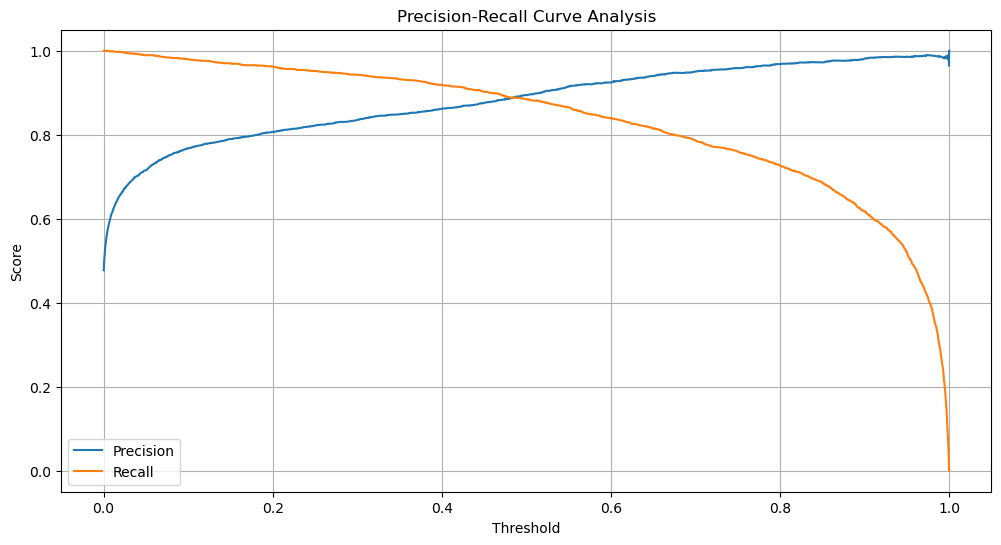

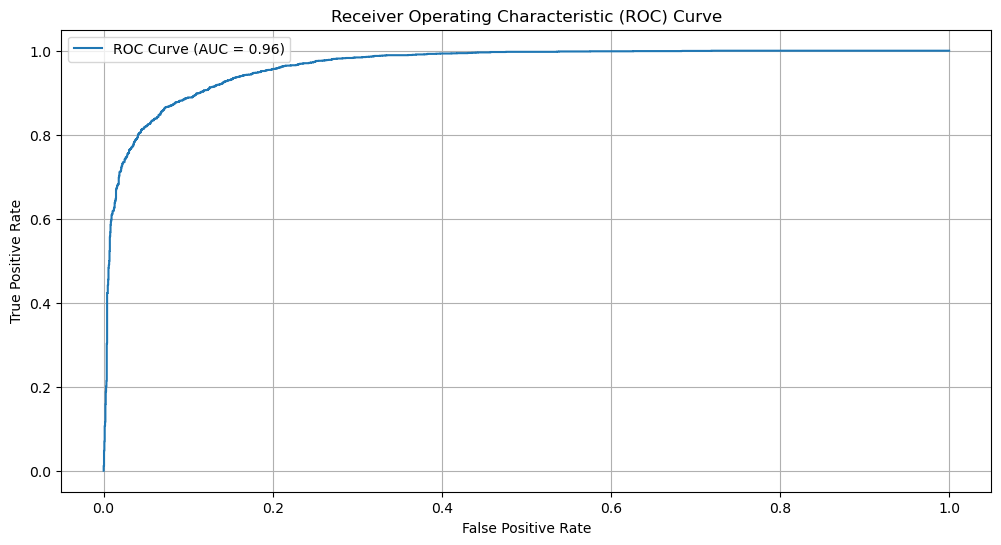

Best Threshold (based on F1 score): 0.42520132660865784


In [7]:
perform_threshold_analysis(model, test_loader)

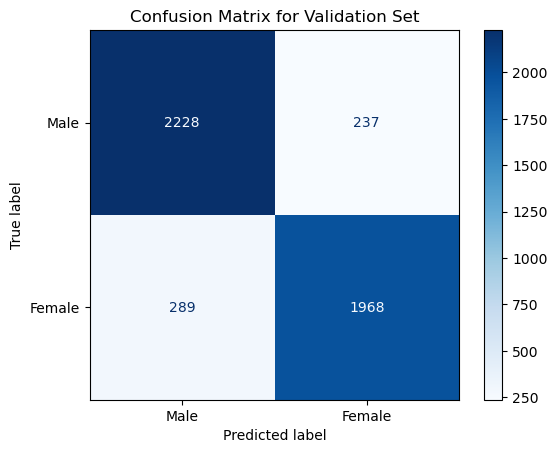

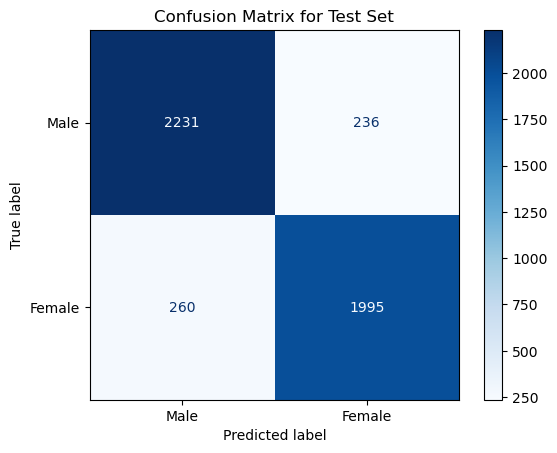

In [8]:
plot_confusion_matrix(model, val_loader, dataset_name="Validation")
plot_confusion_matrix(model, test_loader, dataset_name="Test")

--- Evaluating Model Version: v4 ---
Test Gender Accuracy: 0.8950
Test Age MAE: 5.1087


Version  Test_Gender_Accuracy  Test_Age_MAE
3      v4               0.89496      5.108743

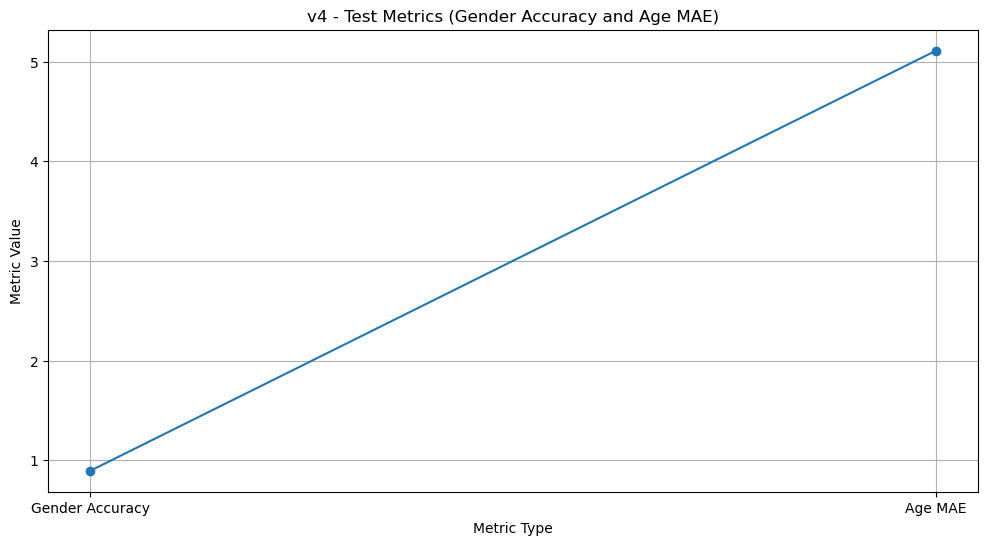

In [10]:
checkpoint_path = f"checkpoints/{VERSION}_best.ckpt"

if os.path.exists(checkpoint_path):
    print(f"--- Evaluating Model Version: {VERSION} ---")
    model = load_model_from_checkpoint(MultiTaskResNet, checkpoint_path, learning_rate=LEARNING_RATE)
    metrics = evaluate_model(model, test_loader)

    if os.path.exists(EVALUATION_FILE):
        evaluation_df = pd.read_csv(EVALUATION_FILE, header=None)
        evaluation_df.columns = ['Version', 'Test_Gender_Accuracy', 'Test_Age_MAE']
        version_eval_metrics = evaluation_df[evaluation_df['Version'] == VERSION]
        display(version_eval_metrics)

        plt.figure(figsize=(12, 6))
        plt.plot(['Gender Accuracy', 'Age MAE'], [version_eval_metrics['Test_Gender_Accuracy'].values[0], version_eval_metrics['Test_Age_MAE'].values[0]], marker='o')
        plt.xlabel('Metric Type')
        plt.ylabel('Metric Value')
        plt.title(f'{VERSION} - Test Metrics (Gender Accuracy and Age MAE)')
        plt.grid(True)
        plt.show()

### Evaluation-Insights

> Classification Metrics

- **Gender Accuracy** for the test set: **0.8950**.
- **Age MAE (Mean Absolute Error)** for the test set: **5.1087**.
- The **precision, recall, and F1-scores** for both genders are relatively balanced, indicating the model performs well without significant bias between "Male" and "Female" predictions.
  
The **accuracy** in classifying gender is slightly lower compared to previous models, but still respectable, indicating consistency in generalization. However, **Age MAE** is relatively higher, meaning that the age prediction is slightly off compared to the previous models.

> Precision-Recall and ROC Curves

- The **Precision-Recall Curve** shows a trade-off as the threshold changes, with precision slightly dropping as recall improves.
- The **ROC Curve** with an **AUC of 0.96** indicates strong model performance in distinguishing between positive and negative cases for gender classification.

> Confusion Matrix Insights

- There are some **misclassifications** between male and female, though the values are reasonable given the overall accuracy.
- The **true positive and false positive counts** show a slight bias towards correctly identifying males over females, which might be worth exploring further.

> Accuracy by Demographic

- The **gender-based performance** shows no major disparity between "Male" and "Female" predictions, indicating balanced classification across genders.
- However, **performance by age group** shows a **significant drop in accuracy** for older age groups (above 60). The **age groups between 0-20** perform better, while **older groups (80-100)** struggle with accuracy, similar to previous models. This trend implies that the model has difficulty with older individuals, potentially due to less representative training data for those groups or less distinct age-related features in older faces.

# Interpretation using LIME

--- Interpreting Model Version: v4 ---
Interpreting model version v4 for gender prediction (sample 1).


  0%|          | 0/1000 [00:00<?, ?it/s]

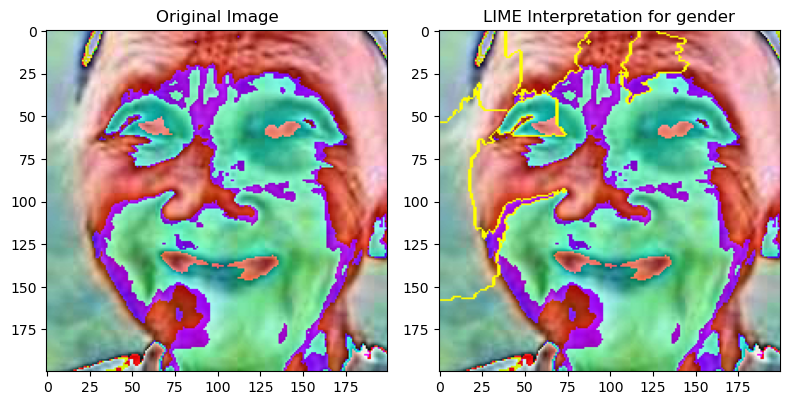

Interpreting model version v4 for age prediction (sample 1).


  0%|          | 0/1000 [00:00<?, ?it/s]

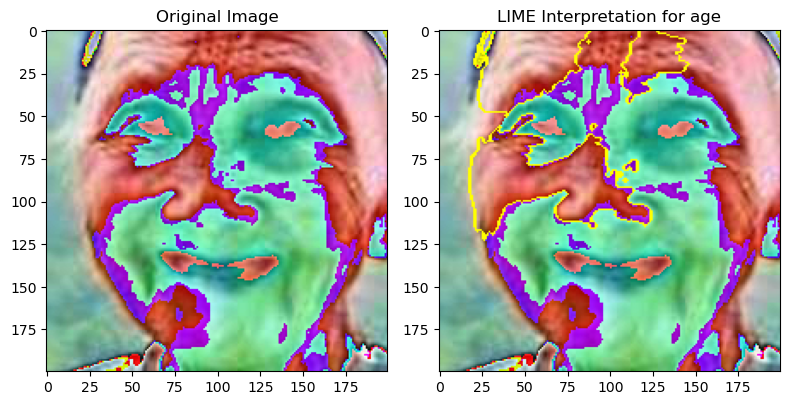

Interpreting model version v4 for gender prediction (sample 2).


  0%|          | 0/1000 [00:00<?, ?it/s]

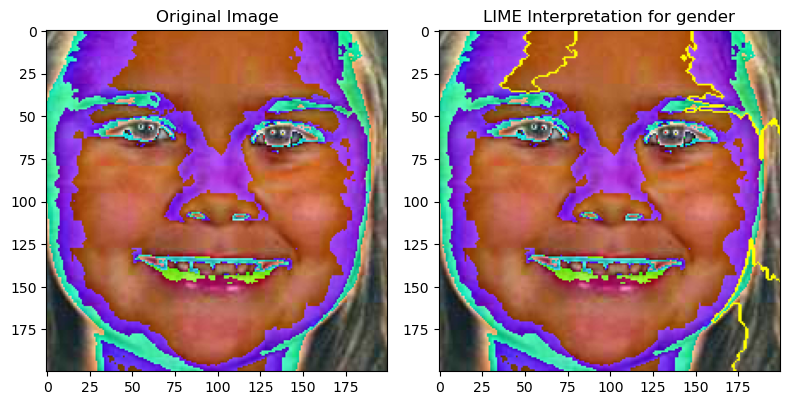

Interpreting model version v4 for age prediction (sample 2).


  0%|          | 0/1000 [00:00<?, ?it/s]

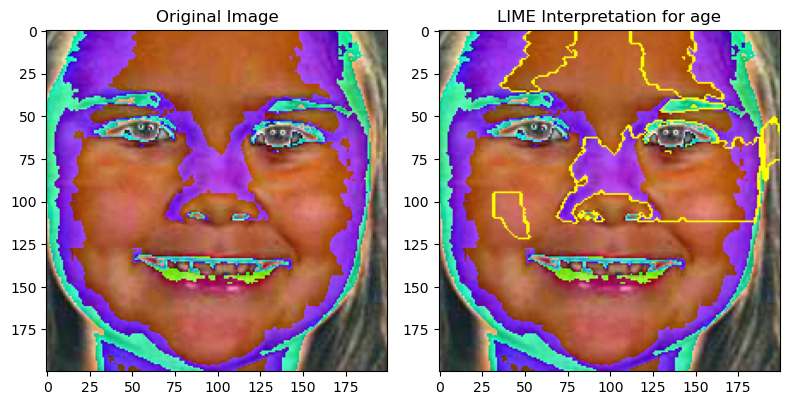

Interpreting model version v4 for gender prediction (sample 3).


  0%|          | 0/1000 [00:00<?, ?it/s]

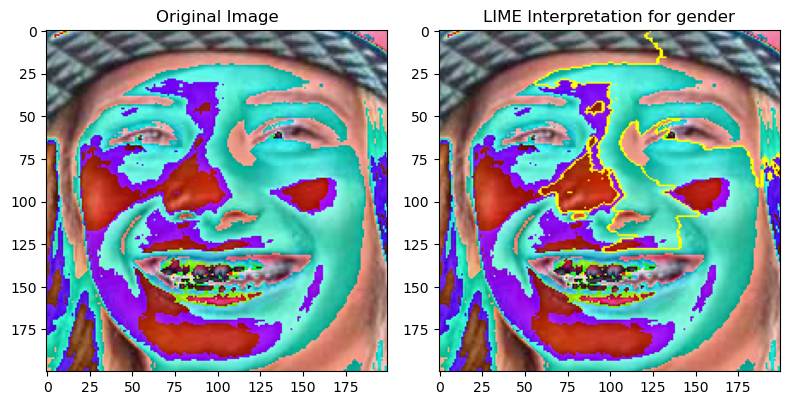

Interpreting model version v4 for age prediction (sample 3).


  0%|          | 0/1000 [00:00<?, ?it/s]

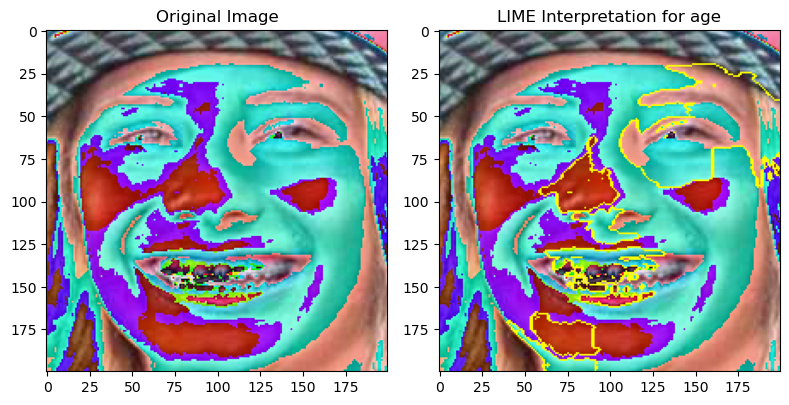

In [11]:
if os.path.exists(checkpoint_path):
    print(f"--- Interpreting Model Version: {VERSION} ---")
    model_wrapper = ModelWrapper(model)
    
    data_iter = iter(test_loader)
    for i in range(3):
        inputs, labels = next(data_iter)
        image_np = inputs[0].permute(1, 2, 0).numpy() * 255 
        label = labels

        print(f"Interpreting model version {VERSION} for gender prediction (sample {i + 1}).")
        interpret_sample(model_wrapper, image_np.astype('uint8'), label, feature_name='gender')

        print(f"Interpreting model version {VERSION} for age prediction (sample {i + 1}).")
        interpret_sample(model_wrapper, image_np.astype('uint8'), label, feature_name='age')

### LIME visualizations for three random samples

1. **Highlighted Regions Consistency:**
   - The LIME explanations indicate that the model consistently focuses on key facial features, such as the eyes, mouth, and forehead, for both gender and age predictions. These are prominent features generally associated with facial recognition tasks and age estimation.
   
2. **Differences in Feature Importance for Gender vs. Age:**
   - For gender prediction, the LIME visualizations highlight areas such as the jawline, facial shape, and mouth, suggesting that these regions play an important role in how the model distinguishes between genders.
   - For age prediction, the focus seems to extend to areas that typically change with aging, such as the eyes and forehead. This makes sense as these areas are often used in human perception for age estimation (e.g., wrinkles, eye shape).

3. **Effectiveness of Feature Attention:**
   - In some samples, LIME shows very focused and tight regions around the facial features. When the highlighted regions are more concentrated, it may indicate better performance for those particular predictions, as the model is likely focusing on relevant features.
   - In other instances, such as with broader or scattered highlighted areas, the model may be less confident or focusing on irrelevant parts of the image, which can contribute to poor performance.

4. **Comparison with Previous Models:**
   - Compared to previous models, Model V4 seems to have similar attention patterns with more distinct feature boundaries highlighted by LIME. This might indicate a more consistent model behavior across different images, which could imply better generalization.
   - However, in some instances, the highlighted regions are less clearly focused on key features, suggesting potential areas for model improvement.

## Best/Worst Performing Samples

--- Evaluating Model Version: v4 ---
Model loaded successfully.
Interpreting model version v4 for best performing sample 1 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

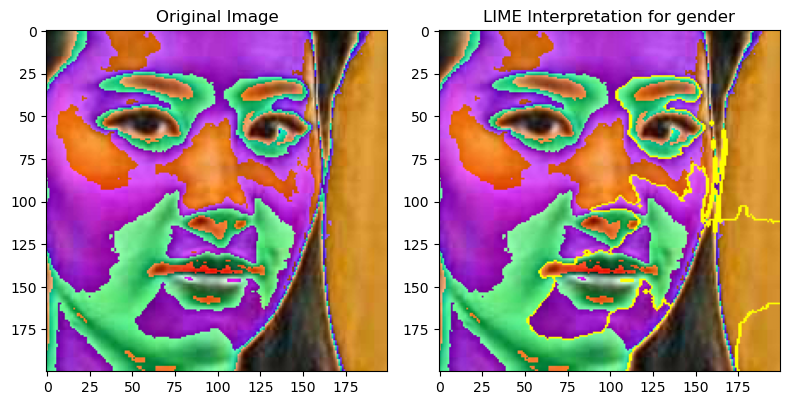

Interpreting model version v4 for best performing sample 1 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

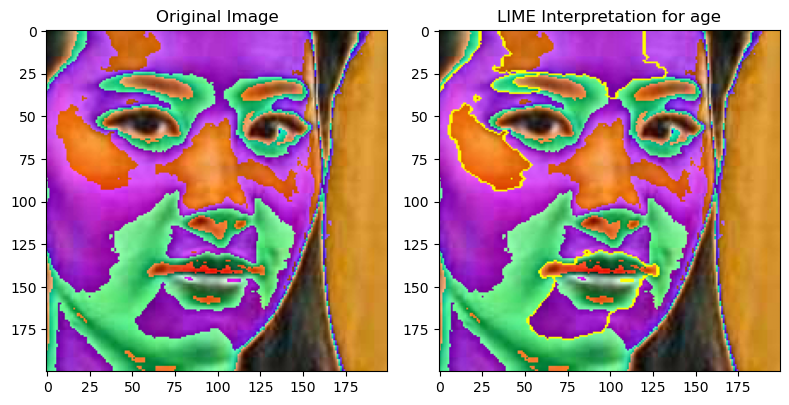

Interpreting model version v4 for best performing sample 2 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

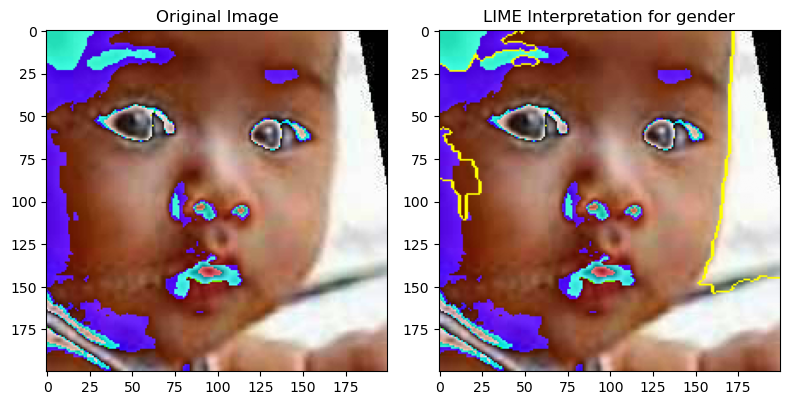

Interpreting model version v4 for best performing sample 2 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

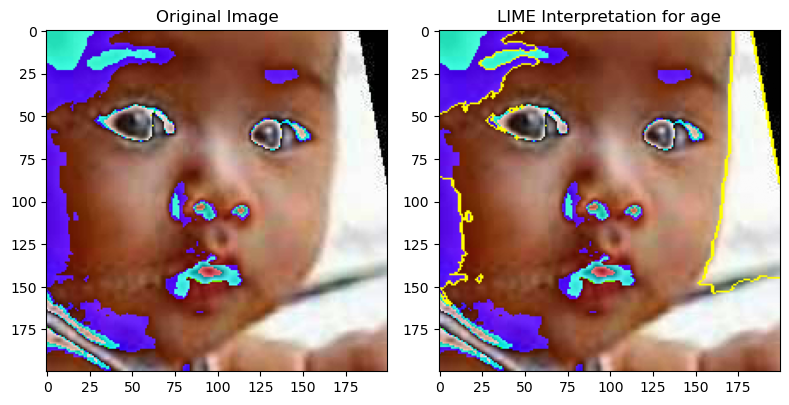

Interpreting model version v4 for best performing sample 3 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

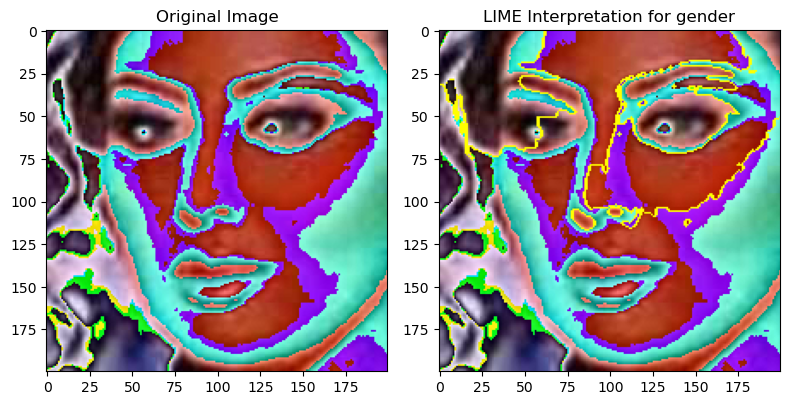

Interpreting model version v4 for best performing sample 3 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

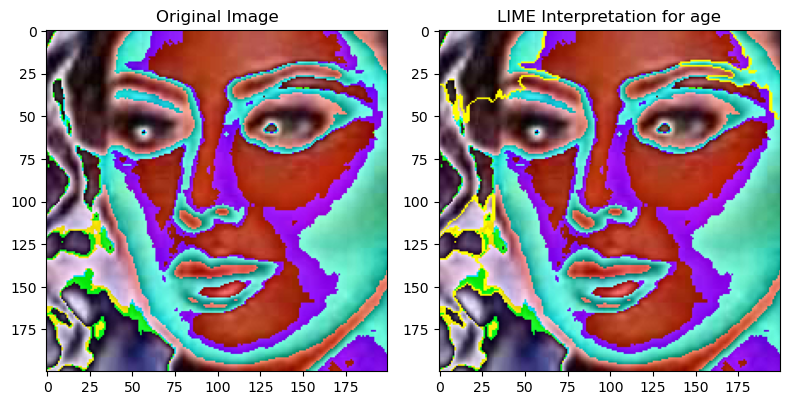

Interpreting model version v4 for worst performing sample 1 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

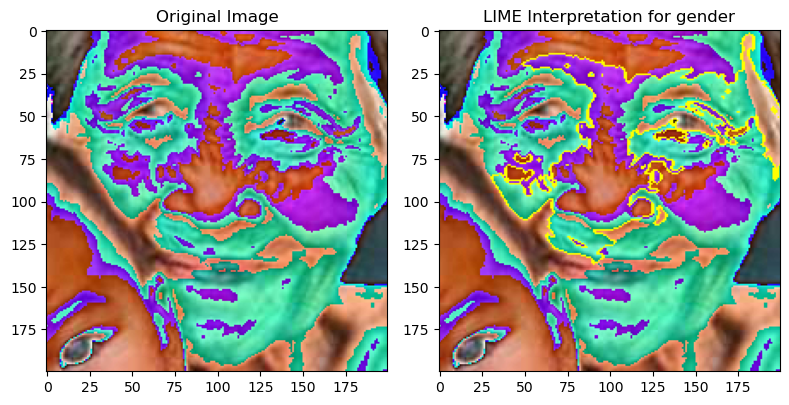

Interpreting model version v4 for worst performing sample 1 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

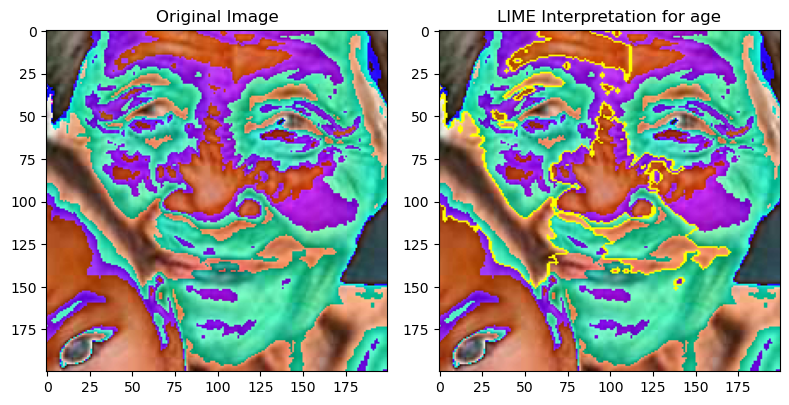

Interpreting model version v4 for worst performing sample 2 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

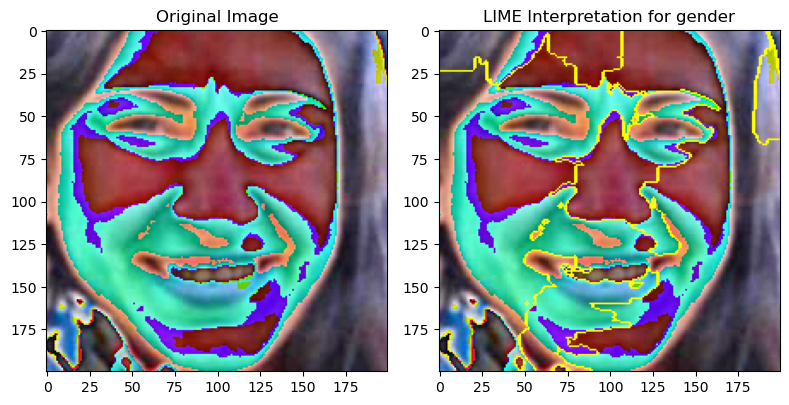

Interpreting model version v4 for worst performing sample 2 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

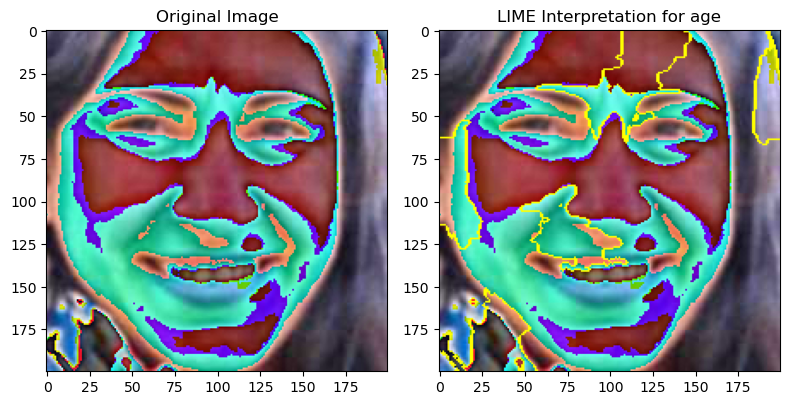

Interpreting model version v4 for worst performing sample 3 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

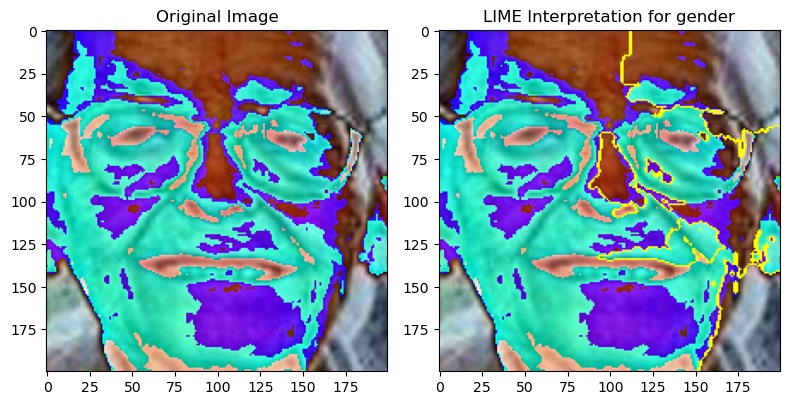

Interpreting model version v4 for worst performing sample 3 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

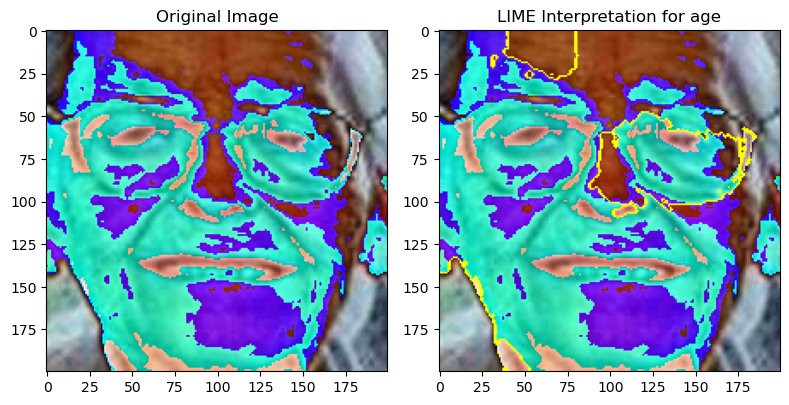

In [12]:
if os.path.exists(checkpoint_path):
    print(f"--- Evaluating Model Version: {VERSION} ---")
    
    try:
        model = load_model_from_checkpoint(MultiTaskResNet, checkpoint_path, learning_rate=LEARNING_RATE)
        print("Model loaded successfully.")
    except Exception as e:
        print(f"Error loading model from checkpoint: {e}")

    try:
        all_predictions, all_targets = evaluate_samples(model, test_loader)

        best_samples, worst_samples = get_best_and_worst_samples(all_predictions)

        model_wrapper = ModelWrapper(model)
        for i, (image, _, _) in enumerate(best_samples):
            image_np = image.permute(1, 2, 0).cpu().numpy() * 255
            print(f"Interpreting model version {VERSION} for best performing sample {i + 1} (gender prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='gender')
            print(f"Interpreting model version {VERSION} for best performing sample {i + 1} (age prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='age')

        for i, (image, _, _) in enumerate(worst_samples):
            image_np = image.permute(1, 2, 0).cpu().numpy() * 255 
            print(f"Interpreting model version {VERSION} for worst performing sample {i + 1} (gender prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='gender')
            print(f"Interpreting model version {VERSION} for worst performing sample {i + 1} (age prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='age')

    except Exception as e:
        print(f"Error during model evaluation: {e}")

### Best Performing Samples

1. **Sample 1**
   - The LIME interpretation highlights facial features like the eyes, nose, and mouth regions, which are usually important for gender and age determination. The regions that are influencing the model's decision are consistent between gender and age, suggesting that the model is effectively focusing on relevant features.

2. **Sample 2**
   - In this case, the model pays particular attention to the eyes and surrounding facial regions for both gender and age classification. These regions often provide strong clues for determining age and gender, which might explain why the model performed well on this sample.

3. **Sample 3**
   - The LIME interpretation shows the focus on the eyes, mouth, and cheeks. These features are commonly used to make decisions for gender and age, suggesting that the model correctly identified key areas.

> Reason for Good Performance:
- **Consistent Focus on Key Facial Features**: The model is attending to important regions such as eyes, mouth, and nose, which are critical for both gender and age predictions.


### Worst Performing Samples:

1. **Sample 1**
   - The LIME interpretations show a more scattered focus, with areas such as the forehead, background, or parts of the face that are less informative for determining gender or age. This scattered focus indicates that the model may not be leveraging the most informative features, leading to poor predictions.

2. **Sample 2**
   - The LIME heatmap reveals that the model is focusing on parts of the face that might not be significant for gender and age classification (e.g., forehead, areas near the edge of the face). This lack of focus on critical features like the eyes and mouth can negatively impact performance.

3. **Sample 3**
   - The LIME interpretation highlights areas that do not clearly contribute to the classification, and the boundaries between regions are inconsistent. The model may be misled by noisy features or irrelevant background areas, affecting its ability to classify correctly.

> Reason for Poor Performance:
- **Irrelevant Focus**: The model is focusing on non-critical regions (such as the background or forehead), which are less informative for gender or age determination.
- **Complexity or Unusual Facial Expressions**: More complex facial expressions or atypical features may have misled the model, causing incorrect predictions.

## Performance Per Gender

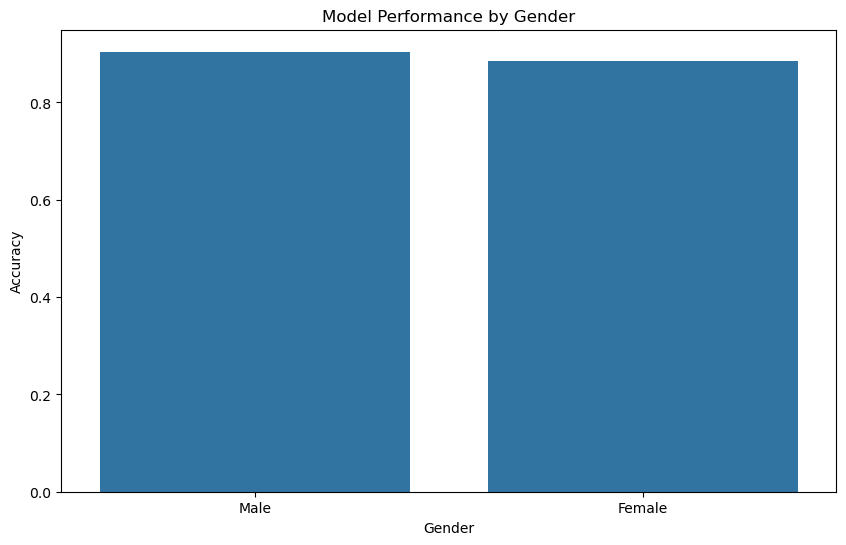

In [13]:
all_gender_targets = []
all_gender_preds = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        images, targets = batch
        gender_targets = targets['gender']
        
        images = images.to(device)
        gender_targets = gender_targets.to(device)
        
        _, gender_preds = model(images)
        gender_preds = torch.argmax(gender_preds, dim=1)

        all_gender_targets.extend(gender_targets.cpu().numpy())
        all_gender_preds.extend(gender_preds.cpu().numpy())

all_gender_targets = np.array(all_gender_targets)
all_gender_preds = np.array(all_gender_preds)

gender_labels = ['Male', 'Female']
gender_results = {label: {'Correct': 0, 'Total': 0} for label in gender_labels}

for actual, pred in zip(all_gender_targets, all_gender_preds):
    gender_results[gender_labels[actual]]['Total'] += 1
    if actual == pred:
        gender_results[gender_labels[actual]]['Correct'] += 1

gender_performance = [gender_results[gender]['Correct'] / gender_results[gender]['Total'] for gender in gender_labels]

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_labels, y=gender_performance)
plt.xlabel('Gender')
plt.ylabel('Accuracy')
plt.title('Model Performance by Gender')
plt.show()

## Performance Per Age Group

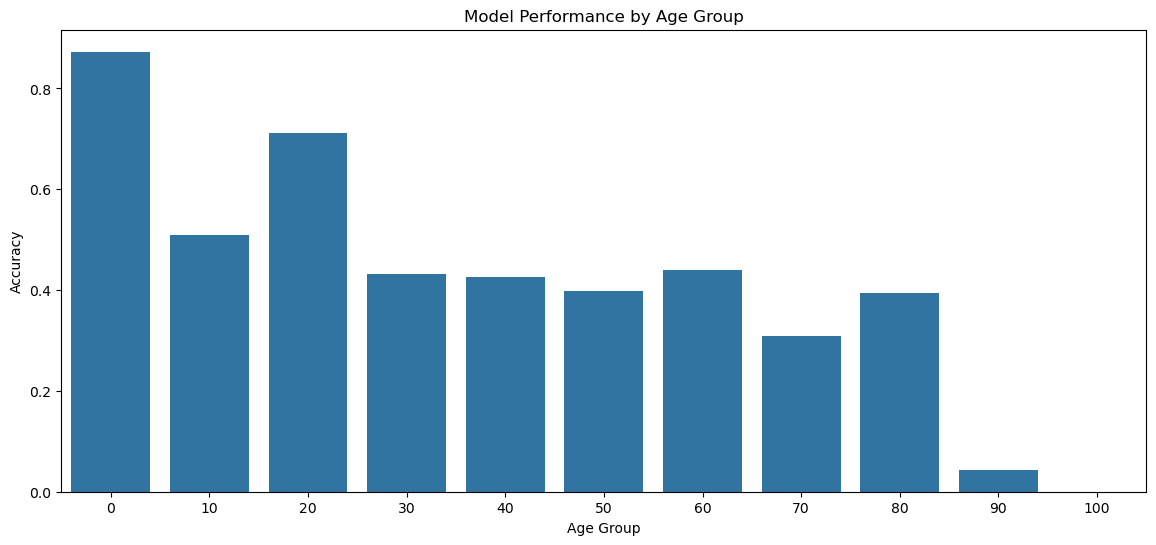

In [14]:
all_age_targets = []
all_age_preds = []

with torch.no_grad():
    for batch in test_loader:
        images, targets = batch
        age_targets = targets['age']

        images = images.to(device)
        age_targets = age_targets.to(device)

        age_preds, _ = model(images)

        all_age_targets.extend(age_targets.cpu().numpy())
        all_age_preds.extend(age_preds.cpu().numpy())

all_age_targets = np.array(all_age_targets)
all_age_preds = np.array(all_age_preds)

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
age_groups = pd.cut(all_age_targets, bins=age_bins)
age_accuracy = []

for age_bin in age_bins[:-1]:
    mask = (all_age_targets >= age_bin) & (all_age_targets < age_bin + 10)
    correct_predictions = np.sum((all_age_preds[mask] >= age_bin) & (all_age_preds[mask] < age_bin + 10))
    accuracy = correct_predictions / np.sum(mask) if np.sum(mask) > 0 else 0
    age_accuracy.append(accuracy)

plt.figure(figsize=(14, 6))
sns.barplot(x=age_bins[:-1], y=age_accuracy)
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt.title('Model Performance by Age Group')
plt.show()

### Age Group Challenges

The performance by age group (shown in the bar chart) reveals that the model performs significantly worse for older age groups (e.g., 80s, 90s, 100s). This is likely due to class imbalance, where there are fewer training samples for these age groups. As a result, the model has not learned well to identify features of older individuals, leading to poorer generalization.

### Conclusion
- The model performs well when it can clearly focus on distinct and relevant facial features without interference from noise or occlusions.
- Poorly performing samples are often affected by image quality, lighting, or distracting backgrounds. For older age groups, a lack of sufficient data leads to poor generalization and incorrect feature highlighting.